# Diabetes Prediction Using ML Algorithms: Gradient Boosting Classifier and  Random Forest Classifier

In [1]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
#LOADING THE DATASET
dataset = pd.read_csv("diabetes.csv")
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#DESCRIPTION OF THE DATASET
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data = dataset.iloc[:,0:8]
outcome = dataset.iloc[:,8]
x,y = data,outcome

In [5]:
#DISTRIBUTION OF DATASET INTO TRAINING AND TESTING SETS
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [6]:
#COUNTING THE POSITIVE AND NEGATIVE VALUES
print(y_test.value_counts())
#MEAN OF THE TESTING DISTRIBUTION
print(1- y_test.mean())

0    130
1     62
Name: Outcome, dtype: int64
0.6770833333333333


In [8]:
#PARAMETER EVALUATION WITH GSC VALIDATION
gbe = GradientBoostingClassifier(random_state=0)
parameters={
    'learning_rate': [0.05, 0.1, 0.5],
    'max_features': [0.5, 1],
    'max_depth': [3, 4, 5]
}
gridsearch=GridSearchCV(gbe,parameters,cv=100,scoring='roc_auc')
gridsearch.fit(x,y)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 0.5}
0.84


In [9]:
#ADJUSTING DEVELOPMENT THRESHOLD
gbi = GradientBoostingClassifier(learning_rate=0.05,max_depth=3,max_features=0.5,random_state=0)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
gbi.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=0.5, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [10]:
#STORING THE PREDICTION
yprediction = gbi.predict_proba(x_test)[:,1]

Text(0, 0.5, 'Frequency')

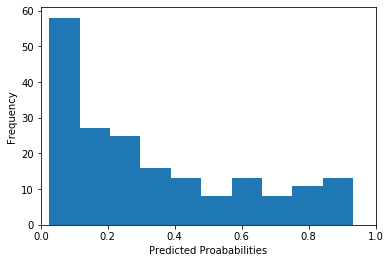

In [11]:
#PLOTTING THE PREDICTIONS
plt.hist(yprediction,bins=10)
plt.xlim(0,1)
plt.xlabel("Predicted Proababilities")
plt.ylabel("Frequency")

In [12]:
#CLASSIFIER SCORE
round(roc_auc_score(y_test,yprediction),5)

0.85248

In [13]:
#USING RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
rmfr = RandomForestClassifier()
rmfr.fit(x_train, y_train)
y_pred = rmfr.predict(x_test)
accuracyrf = round(accuracy_score(y_pred, y_test), 5)
accuracyrf

0.79167

# I have used 2 ML algorithms Gradient Boosting Classifier and  Random Forest Classifier, We can see that the Gradient Bossting Classifier gives the best performance with 85.24% and Random Forest with 79.16%